In [14]:
#importing libraries 
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


In [15]:
dataTrain=pd.read_csv('C:\\Users\sm291\Desktop\AIS\\titanic\\train.csv')
dataTest=pd.read_csv('C:\\Users\sm291\Desktop\AIS\\titanic\\test.csv')

# Data Dictionary 
name -Name of passenger
Pclass - Class of Passenger
Sex- gender
Age- Age of passenger
Sibsp- Sibling information
Parch- spouse information 
Ticket-Ticket Information
Fare- Price of ticket
cabin- cabin of passenger
Embarked - The port 
Survived - Survival

In [16]:
dataTrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
dataTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Survival on the basis of gender

In [18]:
print("total_females=", len(dataTrain[(dataTrain['Sex']=='female')].index))
print("total_males=", len(dataTrain[(dataTrain['Sex']=='male')].index))

total_females= 314
total_males= 577


In [19]:
print([dataTrain.groupby("Sex")['Survived'].value_counts(normalize=True)])

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


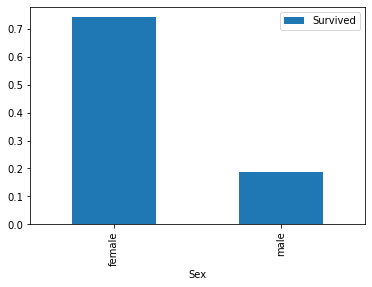

In [20]:
class_pivot = dataTrain.pivot_table(index='Sex',values='Survived')
class_pivot.plot.bar()
plt.show()

# Survived based on passenger class

In [21]:
print("Pclass_1 = ", len(dataTrain[(dataTrain["Pclass"]== 1)].index))
print("Pclass_2 = ", len(dataTrain[(dataTrain["Pclass"]== 2)].index))
print("Pclass_3 = ", len(dataTrain[(dataTrain["Pclass"]== 3)].index))

Pclass_1 =  216
Pclass_2 =  184
Pclass_3 =  491


In [22]:
print([dataTrain.groupby('Pclass')['Survived'].value_counts(normalize= True )])

[Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64]


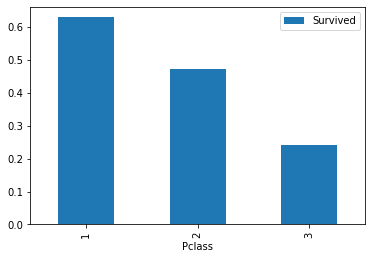

In [23]:
class_pivot = dataTrain.pivot_table(index='Pclass',values='Survived')
class_pivot.plot.bar()
plt.show()

# Age relation with survival


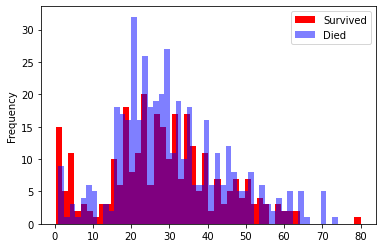

In [24]:

surv= dataTrain[dataTrain['Survived']==1]
die = dataTrain[dataTrain['Survived'] == 0]
surv['Age'].plot.hist(color='red',bins=50)
die['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [26]:
#this can be used to fill Age values
#dataTrain['Age']=dataTrain['Age'].fillna(dataTrain['Age'].mean(), inplace= False)
#dataTrain[dataTrain.Age.isnull()]


# Survival on the basis of Embarked 

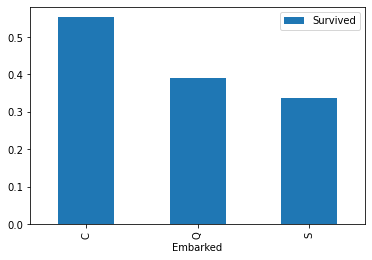

In [27]:
class_pivot = dataTrain.pivot_table(index='Embarked',values="Survived")
class_pivot.plot.bar()
plt.show()

embarked had alot of null values too .and making it numeric and taking average and putting it will produce float values 

In [28]:
dataTrain.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
dataTrain.drop(['Name','PassengerId','SibSp','Ticket','Fare','Cabin','Parch','Embarked','Age'],axis=1,inplace=True)

In [30]:
dataTrain.head()

,Pclass,Sex,Survived
0,3,male,0
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,0


In [31]:
#converting data to numerical values 
#converting male to 0 and female to 1 
dataTrain['Sex'].replace('male',0,inplace=True)
dataTrain['Sex'].replace('female',1,inplace=True)

In [32]:
dataTrain.head()

,Pclass,Sex,Survived
0,3,0,0
1,1,1,1
2,3,1,1
3,1,1,1
4,3,0,0


In [33]:
# Convering Sex to numerical Values 
dataTest['Sex'].replace('male',0,inplace=True)
dataTest['Sex'].replace('female',1,inplace=True)

In [34]:
#checking the first rows to check data 
dataTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
dataTest.drop(['Name','PassengerId','SibSp','Ticket','Fare','Cabin','Parch','Embarked','Age'],axis=1,inplace=True)

In [36]:
dataTest.head()

,Pclass,Sex
0,3,0
1,3,1
2,2,0
3,3,0
4,3,1


# dataTrain and dataTest has been converted totally to numeric 


In [37]:


# Calculate the Euclidean distance between two vectors
# input1 row1 - row containing info about first datapoint
# input2 row2 - row containing info about second datapoint
# Output - Euclidean distance between input datapoints
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2

    return sqrt(distance)





In [38]:
# Locate the most similar neighbors
# input1 train - complete dataset
# input2 test_row  - single row containing info
# input3 num_neighbors - no of knn neighbors
# Output - Array containing k nearest neighbors with their corresponding Euclidean distances.
def get_neighbors(train, test_row, num_neighbors):
    # create an list to store the Euclidean distances of the test_row against the training Dataset
    distances = list()
    # loop over each row of the training Dataset
    for row_idx in range(len(train)):
        # Compute the Euclidean distance between current row of training dataset against the test row
        dist = euclidean_distance(list(train.iloc[row_idx]), test_row)
        # Add the passenger information from training dataset along with the Euclidean distance from the test_row .
        distances.append((list(train.iloc[row_idx]), dist))

    # Sort the distances Array in ascending order
    distances.sort(key=lambda tup: tup[1])
    # Create an empty array to store the nearest neighbors
    neighbors = list()
    # Loop over the number of "k" neighbours defined by the user
    for i in range(num_neighbors):
        # Add the distance values to the neighbors
        neighbors.append(distances[i][0])

    # Return the "k" nearest neighbors
    return neighbors




In [39]:
# Make a classification prediction with neighbors
# input1 train - complete dataset
# input2 test_row  - single row containing info
# input3 num_neighbors - no of knn neighbors
# Output - Prediction label for the input test_row
def predict_classification(train, test_row, num_neighbors):
    # Get all neighbors for the test row
    neighbors = get_neighbors(train, test_row, num_neighbors)
    # Get the survival info for neighbors
    output_values = [row[-1] for row in neighbors]
    # Find the label that most neighbors have
    prediction = max(set(output_values), key=output_values.count)
    # Prediction is the label that most neighbors have
    return prediction




In [40]:
if __name__ == "__main__":
    # Read Train data
    dataTrain = pd.read_csv('C:\\Users\\sm291\\Desktop\\train.csv')
    # Read test data
    dataTest = pd.read_csv('C:\\Users\\sm291\\Desktop\\test.csv')
    # Number of Neighbors
    numNeighbours = 21
    # Create empty array to store predictions of knn
    pred = []

    # Loop over test data
    for i in range(len(dataTest)):
        print('Processing passengerId ' + str(i) + '/' + str(len(dataTest)))
        pred.append([892+i, predict_classification(dataTrain, list(dataTest.iloc[i]), numNeighbours)])

    # Temporary array for CSV writing
    tempArr = np.asarray(pred)
    # Write CSV
    with open("Output3.csv", "wb") as f:
        f.write(b'PassengerId,Survived\n')
        np.savetxt(f, tempArr.astype(int), fmt='%i', delimiter=",")
    

Processing passengerId 0/418
Processing passengerId 1/418
Processing passengerId 2/418
Processing passengerId 3/418
Processing passengerId 4/418
Processing passengerId 5/418
Processing passengerId 6/418
Processing passengerId 7/418
Processing passengerId 8/418
Processing passengerId 9/418
Processing passengerId 10/418
Processing passengerId 11/418
Processing passengerId 12/418
Processing passengerId 13/418
Processing passengerId 14/418
Processing passengerId 15/418
Processing passengerId 16/418
Processing passengerId 17/418
Processing passengerId 18/418
Processing passengerId 19/418
Processing passengerId 20/418
Processing passengerId 21/418
Processing passengerId 22/418
Processing passengerId 23/418
Processing passengerId 24/418
Processing passengerId 25/418
Processing passengerId 26/418
Processing passengerId 27/418
Processing passengerId 28/418
Processing passengerId 29/418
Processing passengerId 30/418
Processing passengerId 31/418
Processing passengerId 32/418
Processing passenger

Processing passengerId 268/418
Processing passengerId 269/418
Processing passengerId 270/418
Processing passengerId 271/418
Processing passengerId 272/418
Processing passengerId 273/418
Processing passengerId 274/418
Processing passengerId 275/418
Processing passengerId 276/418
Processing passengerId 277/418
Processing passengerId 278/418
Processing passengerId 279/418
Processing passengerId 280/418
Processing passengerId 281/418
Processing passengerId 282/418
Processing passengerId 283/418
Processing passengerId 284/418
Processing passengerId 285/418
Processing passengerId 286/418
Processing passengerId 287/418
Processing passengerId 288/418
Processing passengerId 289/418
Processing passengerId 290/418
Processing passengerId 291/418
Processing passengerId 292/418
Processing passengerId 293/418
Processing passengerId 294/418
Processing passengerId 295/418
Processing passengerId 296/418
Processing passengerId 297/418
Processing passengerId 298/418
Processing passengerId 299/418
Processi